In [2]:
import os
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import preprocess
import data_loader
import models
import test_model

In [5]:
import commentjson
from pydoc import locate

import pickle

In [6]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
import matplotlib.animation as animation

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support

In [19]:
import glob
plt.rcParams['figure.figsize'] = [6, 6]

In [9]:
import sys
sys.path.append("/users/ak1774/scratch/esport/death_prediction/testing")

In [10]:
import load_predictions

In [11]:
all_y,all_pred,all_per_sec_pred,all_model_path = load_predictions.load_all_presictions()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [17]:
all_model_path

['/users/ak1774/scratch/esport/cluster_results/FixedMinimal/3/model.model',
 '/mnt/lustre/users/ak1774/esport/cluster_results/FixedMinimalSmallModelChekpoint/2/model1299.model',
 '/users/ak1774/scratch/esport/cluster_results/FixedMediumChekpoint/1/model599.model',
 '/mnt/lustre/users/ak1774/esport/cluster_results/FixedAllChekpoint/0/model599.model']

In [16]:
print(len(all_y[0]))


149


In [12]:
all_y_np = []
all_pred_np = []
for i in range(len(all_model_path)):
    print(i)
    all_y_np.append(np.empty((0,10)))
    all_pred_np.append(np.empty((0,10)))
    
    for match_i in range(len(all_y[i])):
        if match_i % 30 == 0:
            print(match_i)
        all_y_np[i] = np.append(all_y_np[i],all_y[i][match_i][:-2000],axis=0)
        all_pred_np[i] = np.append(all_pred_np[i],all_pred[i][match_i][:-2000],axis=0)

    

0
0
30
60
90
120
150
180
210
240
270
1
0
30
60
90
120
150
180
210
240
270
2
0
30
60
90
120
150
180
210
240
270
3
0
30
60
90
120
150
180
210
240
270


In [18]:
average_precision_score(all_y_np[0].reshape(-1),all_pred_np[0].reshape(-1))

0.47714036286363476

In [13]:
pr_scores = []
for i in range(len(all_model_path)):
    print(i)
    pr_scores.append(average_precision_score(all_y_np[i].reshape(-1),all_pred_np[i].reshape(-1)))
    print(pr_scores[-1])

0
0.5036021005247152
1
0.5001490168405394
2
0.5365400170604411
3
0.5447964422731885


In [32]:
#f1_scores = []
for i in range(len(all_model_path)):
    print(i)
    #print(classification_report(all_y_np[i].reshape(-1),all_pred_np[i].reshape(-1) > 0.5))
    #print(f1_scores[-1])

0
1
2
3


In [39]:
for val in [0.5,0.7,0.8,0.85,0.9]:
    print(val)
    print(precision_recall_fscore_support(all_y_np[3].reshape(-1),all_pred_np[3].reshape(-1) > val))

0.5
(array([0.99926132, 0.15102068]), array([0.94275469, 0.93594614]), array([0.97018593, 0.26007642]), array([50521942,   549678]))
0.7
(array([0.99871683, 0.21289401]), array([0.96435571, 0.88611878]), array([0.98123554, 0.34330698]), array([50521942,   549678]))
0.8
(array([0.9981657 , 0.26848905]), array([0.97523983, 0.83527811]), array([0.98656959, 0.4063593 ]), array([50521942,   549678]))
0.85
(array([0.99771264, 0.31208757]), array([0.9809753 , 0.79329171]), array([0.98927318, 0.44794848]), array([50521942,   549678]))
0.9
(array([0.99697918, 0.37767608]), array([0.98700006, 0.72512999]), array([0.99196453, 0.49666801]), array([50521942,   549678]))


In [14]:
len(all_y[0])

294

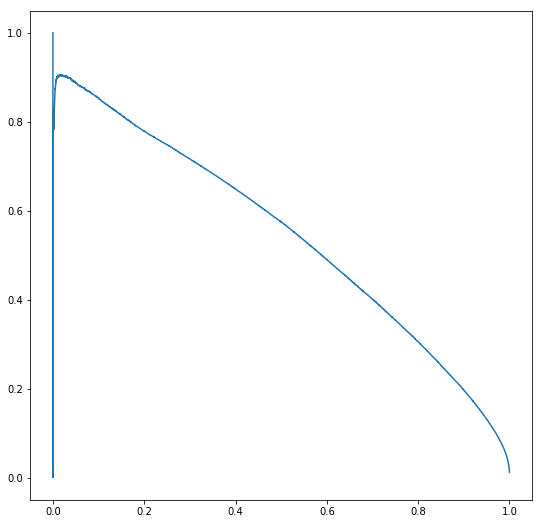

In [18]:
precision, recall, thresholds = precision_recall_curve(all_y_np[3].reshape(-1),all_pred_np[3].reshape(-1))
#baseline = (all_y_np[3] > 0.5).sum() / all_y.size
#plt.plot([0,1], [baseline,baseline], linestyle='--')
plt.plot(recall, precision)

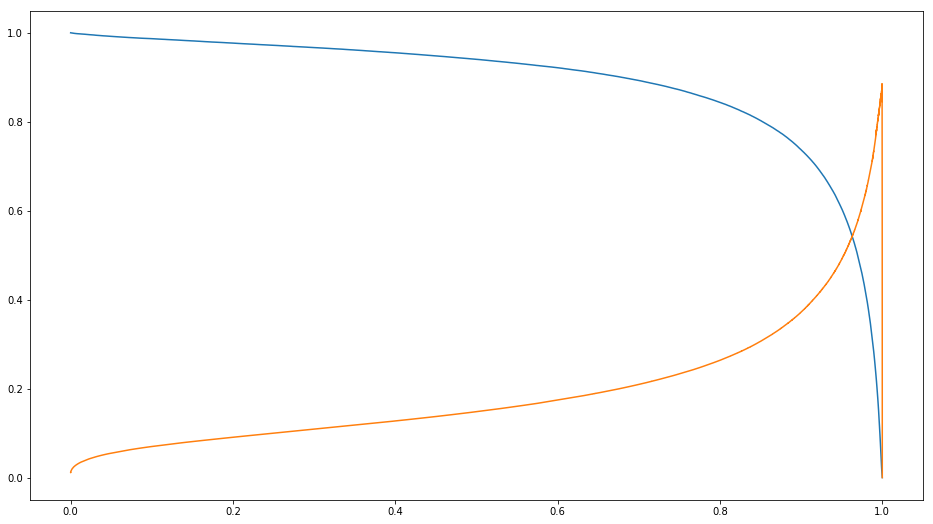

In [25]:
plt.plot(thresholds,recall[:-1])
plt.plot(thresholds, precision[:-1])

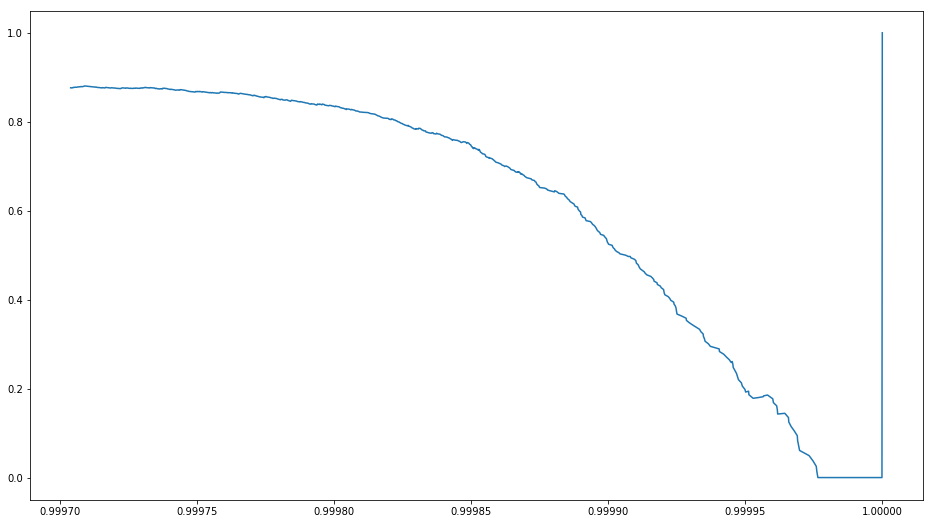

In [37]:
plt.plot(thresholds[-1000:], precision[-1000:])

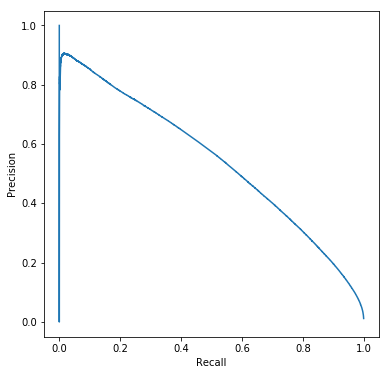

In [25]:
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.savefig('PR_curve.png', dpi=400,bbox_inches='tight')

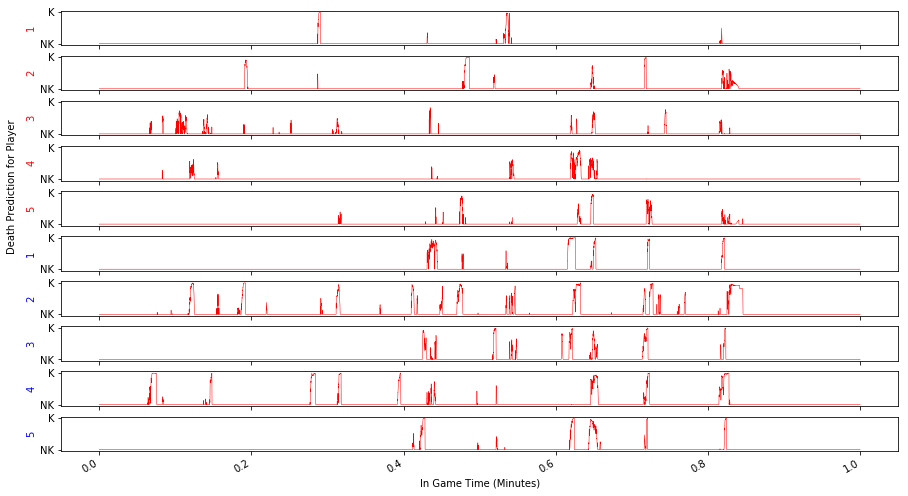

In [139]:
import numpy as np
from matplotlib import pyplot as plt


#plot all the heros and all of the data points
heroStuff1 =  all_pred[2][0]    # np.load('hero.npy')
labelStuff1 = all_y[2][0]      #np.load('label.npy')
xLims = np.linspace(0,1,all_pred[2][0].shape[0]) #np.repeat(np.linspace(0,1,all_pred[3][0].shape[0]).reshape(-1,1),10,axis=1)     # np.load('xLims.npy')

#healthes = np.load('health.npy')
clip = 0.5

heroStuff1 = np.clip(heroStuff1,clip,1)
heroStuff1 = np.interp(heroStuff1, (heroStuff1.min(), heroStuff1.max()), (0, +1))
heroStuff1 = (heroStuff1 -1)

labelStuff1 = (labelStuff1 -1) * -1 

#heroStuff1 = heroStuff1[:,:17000]
#labelStuff1 = labelStuff1[:,:17000]
#xLims = xLims[:17000]


'''
heroStuff1 = heroStuff1[:,2500:5000]
labelStuff1 = labelStuff1[:,2500:5000]
xLims = xLims[2500:5000]
print(min(xLims))
print(max(xLims))
'''
#newHealthes = []
#for i in healthes:
#    newHealthes.append( np.interp(i, (i.min(), i.max()), ( -1,0)))
    
    
players = [0,1,2,3,4,5,6,7,8,9]
#players = [0,1,2,3,4]
graphIndex =0
f, axarr = plt.subplots(len(players), sharex=True, sharey=True)
for i in players:
    ticks = ['no kill','kill']
    reducedLabels = np.diff(labelStuff1[i])
    result = np.where(reducedLabels == 1)    
    
    xScatter = np.take(xLims,result[0])
    yLims = np.full( len(xScatter),0)
    


    
    axarr[i].plot(xLims, heroStuff1[:,i] ,color='red',linewidth=0.5)
    axarr[i].scatter(xScatter,yLims,s=50  , marker  ='$K$',color='darkblue')
    ticks = ['no kill','NK','K']
    axarr[i].set_yticklabels(ticks)
    if graphIndex < 5:
        axarr[i].set_ylabel(graphIndex+1,color = 'red')
    else:
        axarr[i].set_ylabel((graphIndex+1)-5,color = 'blue')
    #plt.plot(xLims, newHealthes[i] ,color='green',linewidth=0.3)
    #plt.plot(xLims,labelStuff1[i] ,color='blue',linewidth=0.5)
    graphIndex +=1
    

#axarr[9].set_xticklabels(newLims)
#axarr[9].set_xticks([])

f.subplots_adjust(hspace=0.3)
#f.set_figheight(15)
f.set_figwidth(15)

plt.xlabel('In Game Time (Minutes)')
plt.figtext(0.075, 0.7, "Death Prediction for Player",rotation = 90)
plt.gcf().autofmt_xdate()
graphIndex =0
plt.savefig('gamePrediction.png', dpi=400,bbox_inches='tight')
plt.show()


In [132]:
np.repeat(np.linspace(0,1,20).reshape(-1,1),10,axis=1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158,
        0.05263158, 0.05263158, 0.05263158, 0.05263158, 0.05263158],
       [0.10526316, 0.10526316, 0.10526316, 0.10526316, 0.10526316,
        0.10526316, 0.10526316, 0.10526316, 0.10526316, 0.10526316],
       [0.15789474, 0.15789474, 0.15789474, 0.15789474, 0.15789474,
        0.15789474, 0.15789474, 0.15789474, 0.15789474, 0.15789474],
       [0.21052632, 0.21052632, 0.21052632, 0.21052632, 0.21052632,
        0.21052632, 0.21052632, 0.21052632, 0.21052632, 0.21052632],
       [0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789,
        0.26315789, 0.26315789, 0.26315789, 0.26315789, 0.26315789],
       [0.31578947, 0.31578947, 0.31578947, 0.31578947, 0.31578947,
        0.31578947, 0.31578947, 0.31578947, 0.31578947, 0.31578947],
       [0.36842105, 0.36842105, 0.3684210

array([[0. ],
       [0.5],
       [1. ]])

In [ ]:
precision, recall, thresholds = precision_recall_curve(all_y[0].reshape(-1), all_pred[0].reshape(-1))

In [110]:
pr_scores = []
for i in range(len(all_model_path)):
    print(i)
    pr_scores.append(average_precision_score(np.array(all_y[0]).reshape(-1),np.array(all_pred[0]).reshape(-1)))
    print(pr_scores[-1])

0


ValueError: unknown format is not supported

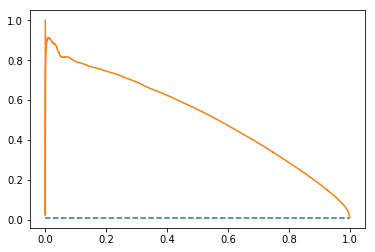

In [13]:
baseline = (all_y[0] > 0.5).sum() / all_y[0].size
plt.plot([0,1], [baseline,baseline], linestyle='--')
plt.plot(recall, precision)

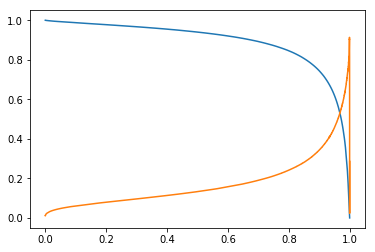

In [14]:
plt.plot(thresholds,recall[:-1])
plt.plot(thresholds, precision[:-1])

Text(0, 0.5, 'predicted probability')

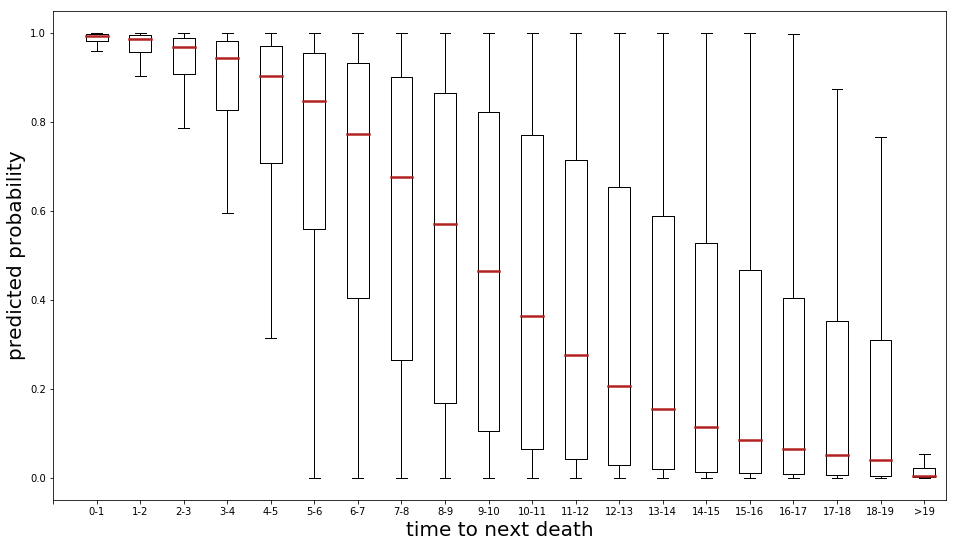

In [16]:
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
plt.boxplot(all_per_sec_pred[0],showfliers=False,medianprops=medianprops)
plt.xticks(list(range(21)), ["",*[str(i) + "-" + str(i+1) for i in range(19)],">19"])
plt.xlabel("time to next death", fontsize=20)
plt.ylabel("predicted probability", fontsize=20)

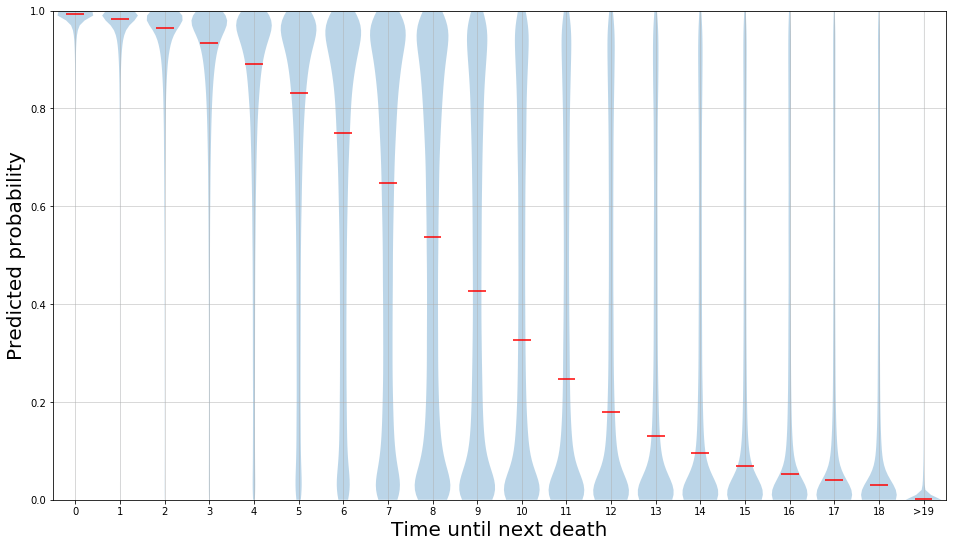

In [16]:
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')
fig, ax = plt.subplots()
r = ax.violinplot(all_per_sec_pred[3],showmedians=True,widths=0.8, showextrema=False)
r['cmedians'].set_color('r')
plt.xticks(list(range(21)), ["",*[str(i) for i in range(19)],">19"])
plt.ylim( (0.0,1.0) )
plt.xlim( (0.5,20.5) )
ax.set_ylabel("Predicted probability", fontsize=20)
plt.xlabel("Time until next death", fontsize=20)
plt.grid(alpha = 0.6)
fig.savefig("violin", dpi=400,bbox_inches = 'tight')

In [75]:
means = [ np.array(predictions).mean() for predictions in all_per_sec_pred[0]]

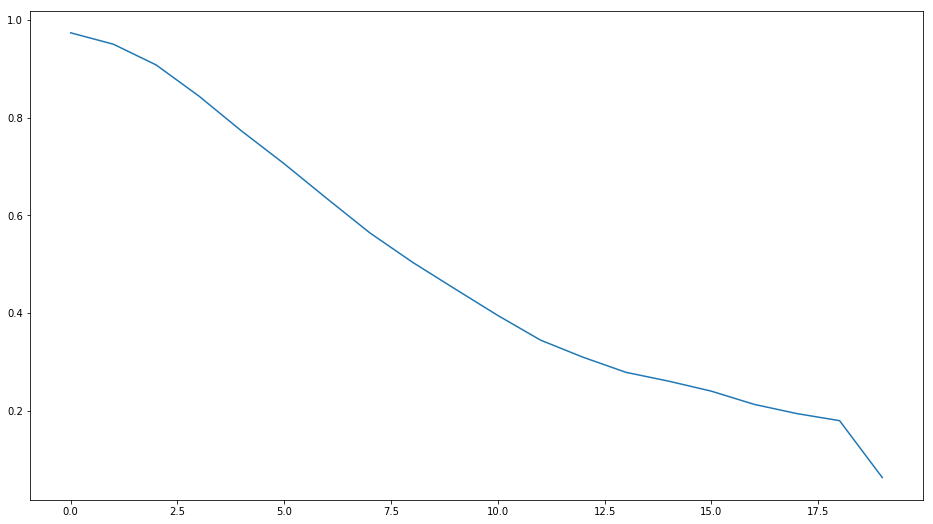

In [76]:
plt.plot(means)

In [11]:
type(all_y[0])

numpy.ndarray

In [12]:
all_y[0].shape

(14024189, 10)

In [71]:
vals = [[] for _ in range(10)] 

#num_positives = [ sum((all_pred[0].reshape(-1) > treshold)) for treshold in np.linspace(0.3,0.98,10)]

for threshold_i,treshold in enumerate(np.linspace(0.3,0.98,10)):
    print(threshold_i)
    last_val = 0
    for i in reversed(range(20)):

        current_true_preds = sum(np.array(all_per_sec_pred[0][i]) > treshold)

        vals[threshold_i].append( last_val + current_true_preds )#/ num_positives[threshold_i])

        last_val = vals[threshold_i][-1]

0
1
2
3
4
5
6
7
8
9


In [72]:
np.array(vals).T

array([[143187, 121627, 103631,  88355,  74572,  60974,  47430,  33946,
         19775,   4003],
       [144455, 122702, 104545,  89121,  75224,  61491,  47821,  34235,
         19929,   4010],
       [145920, 123910, 105529,  89969,  75943,  62022,  48219,  34530,
         20079,   4032],
       [147535, 125289, 106712,  90955,  76736,  62663,  48710,  34860,
         20254,   4055],
       [149315, 126853, 108092,  92155,  77720,  63507,  49353,  35305,
         20474,   4071],
       [151185, 128540, 109612,  93479,  78822,  64425,  50064,  35821,
         20784,   4105],
       [153170, 130299, 111187,  94866,  79997,  65393,  50838,  36431,
         21172,   4167],
       [155399, 132238, 112885,  96345,  81302,  66490,  51737,  37104,
         21610,   4265],
       [157856, 134455, 114867,  98114,  82821,  67777,  52804,  37938,
         22118,   4397],
       [160637, 136984, 117215, 100193,  84633,  69344,  54151,  38975,
         22786,   4559],
       [163766, 139893, 119913

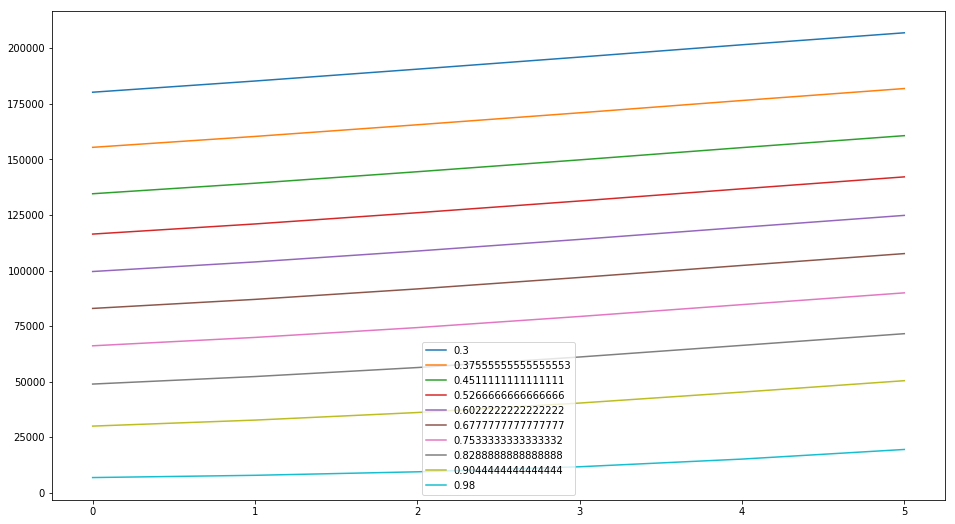

In [74]:
plt.plot(np.array(vals).T[14:,:])
plt.legend(np.linspace(0.3,0.98,10))


In [68]:
current_true_preds = sum(np.array(all_per_sec_pred[0][19]) > 0.5)
current_true_preds2 = sum(np.array(all_per_sec_pred[0][19]) > 0.8)

In [40]:
current_true_preds

177380

In [41]:
current_true_preds2

73554

In [45]:
num_positives_08

55088

In [46]:
num_positives_05

55088

In [56]:
np.linspace(0.1,0.98,10)

array([0.1       , 0.19777778, 0.29555556, 0.39333333, 0.49111111,
       0.58888889, 0.68666667, 0.78444444, 0.88222222, 0.98      ])

In [8]:


modelPath = "/mnt/lustre/groups/cs-dclabs-2019/esport/death_pred_results/2019-03-12_18-30-12/10/model.model"
#modelPath = "/users/ak1774/scratch/esport/10_afternoon/model.model"
#modelPath = "/users/ak1774/scratch/esport/cluter_results/2019-03-12_18-30-12/10/model.model"
config_path = "/users/ak1774/scratch/esport/cluter_results/2019-03-12_18-30-12/10/config.json"
dataPath = "/mnt/lustre/groups/cs-dclabs-2019/esport/death_prediction_data/test_whole_matches/4135911187_1659879048_whole_match_normalized.h5"



In [9]:
dataPath_vec = glob.glob("/mnt/lustre/groups/cs-dclabs-2019/esport/death_prediction_data/test_whole_matches/*.h5")

In [10]:
#dataPath_vec = dataPath_vec[0:10]

In [11]:
with open(config_path) as f:
    config = commentjson.load(f)

In [12]:
data = data_loader.load_data_from_file(dataPath)

In [13]:
modeldata = test_model.load_pytorch_model(modelPath,config,data)

loaded model


In [14]:
labels = [(i,label) for i,label in  enumerate(list(data))]
death_time_indicies = preprocess.labels_to_indicies(preprocess.select_features_by_name("time_until_next_death",labels))
death_times = data.values[:,death_time_indicies].astype(np.float32)

time_vec = data['time'].values

In [15]:
all_y = np.empty((0,10))
all_pred = np.empty((0,10))

per_sec_pred = [[] for _ in range(20)]


for i,dataPath in enumerate(dataPath_vec):
    print(i)
    data = data_loader.load_data_from_file(dataPath)
    modeldata = test_model.load_pytorch_model(modelPath,config,data)
    
    labels = [(i,label) for i,label in  enumerate(list(data))]
    death_time_indicies = preprocess.labels_to_indicies(preprocess.select_features_by_name("time_until_next_death",labels))
    death_times = data.values[:,death_time_indicies].astype(np.float32)
    
    with torch.no_grad():
        y = modeldata.fullGameLabels
        X = [torch.from_numpy(hero_X) for hero_X in modeldata.fullGameData]
        pred = modeldata.model(X)
        pred = torch.sigmoid(pred)
        pred = pred.cpu().detach().numpy()
        
        all_y = np.append(all_y,y,axis=0)
        all_pred = np.append(all_pred,pred,axis=0)
        
        for timeslot_i in range(19):
            mask_die_in_timeslot = np.logical_and( (death_times > timeslot_i), (death_times < (timeslot_i+1)))
            per_sec_pred[timeslot_i].extend(pred[mask_die_in_timeslot].reshape(-1))
        
        mask_die_in_timeslot = (death_times > 19)
        per_sec_pred[19].extend(pred[mask_die_in_timeslot].reshape(-1))
        
        


0
loaded model
1
loaded model
2
loaded model
3
loaded model
4
loaded model
5
loaded model
6
loaded model
7
loaded model
8
loaded model
9
loaded model
10
loaded model
11
loaded model
12
loaded model
13
loaded model
14
loaded model
15
loaded model
16
loaded model
17
loaded model
18
loaded model
19
loaded model
20
loaded model
21
loaded model
22
loaded model
23
loaded model
24
loaded model
25
loaded model
26
loaded model
27
loaded model
28
loaded model
29
loaded model
30
loaded model
31
loaded model
32
loaded model
33
loaded model
34
loaded model
35
loaded model
36
loaded model
37
loaded model
38
loaded model
39
loaded model
40
loaded model
41
loaded model
42
loaded model
43
loaded model
44
loaded model
45
loaded model
46
loaded model
47
loaded model
48
loaded model
49
loaded model
50
loaded model
51
loaded model
52
loaded model
53
loaded model
54
loaded model
55
loaded model
56
loaded model
57
loaded model
58
loaded model
59
loaded model
60
loaded model
61
loaded model
62
loaded model
63

In [16]:
all_pred.shape

(1995863, 10)

In [19]:
sum((all_y < 0.5).reshape(-1))

19750494

In [18]:
sum((all_y > 0.5).reshape(-1))

208136

In [20]:
19750494/(19750494+208136)

0.9895716289144094

In [21]:
208136/(19750494+208136)

0.010428371085590544

In [196]:
accuracy_vec = ((all_pred > 0.5) == (all_y > 0.5)).astype(np.float32)

In [197]:
true_pos_mask = np.logical_and((all_pred > 0.5),(all_y > 0.5))
false_pos_mask = np.logical_and((all_pred > 0.5),(all_y <= 0.5))
true_neg_mask = np.logical_and((all_pred <= 0.5),(all_y <= 0.5))
false_neg_mask = np.logical_and((all_pred <= 0.5),(all_y > 0.5))

In [198]:
true_pos = positive_accuracy_vec.sum()
false_pos = positive_accuracy_vec.sum()

In [199]:
negative_accuracy_vec.mean()

0.9735006

In [200]:
true_pos = true_pos_mask.sum()
false_pos = false_pos_mask.sum()
true_neg = true_neg_mask.sum()
false_neg = false_neg_mask.sum()
    
print("Overall accuracy: ",accuracy_vec.mean())
print("true pos: ",true_pos_mask.sum())
print("false pos ",false_pos_mask.sum())
print("true neg: ",true_neg_mask.sum())
print("false neg ",false_neg_mask.sum())

Overall accuracy:  0.9347891
true pos:  18587
false pos  118546
true neg:  1700378
false neg  1369


In [201]:
precision = true_pos / (true_pos + false_pos)
precision

0.1355399502672588

In [202]:
recall = true_pos / (true_pos + false_neg)
recall

0.9313990779715374

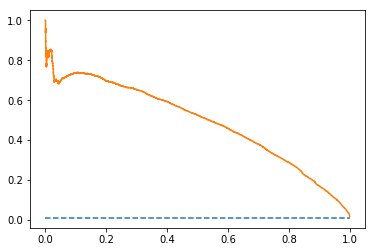

In [203]:

precision, recall, thresholds = precision_recall_curve(all_y.reshape(-1), all_pred.reshape(-1))
baseline = (all_y > 0.5).sum() / all_y.size
plt.plot([0,1], [baseline,baseline], linestyle='--')
plt.plot(recall, precision)



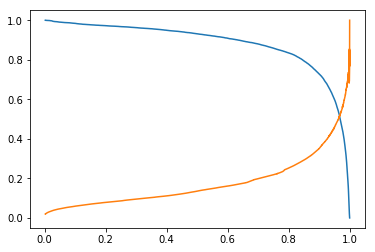

In [204]:
plt.plot(thresholds,recall[:-1])
plt.plot(thresholds, precision[:-1])

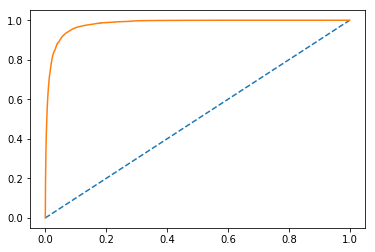

In [205]:
fpr, tpr, thresholds = roc_curve(all_y.reshape(-1), all_pred.reshape(-1))

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

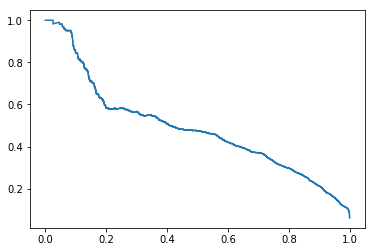

In [160]:
precision, recall, thresholds = precision_recall_curve(y.reshape(-1), pred.reshape(-1))
plt.plot(recall, precision)




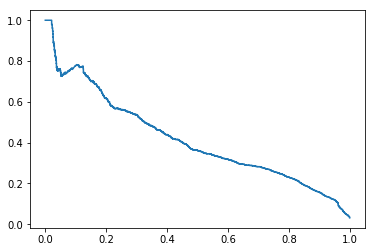

In [112]:

precision2, recall2, thresholds2 = precision_recall_curve(y.reshape(-1), pred.reshape(-1))
plt.plot(recall, precision)


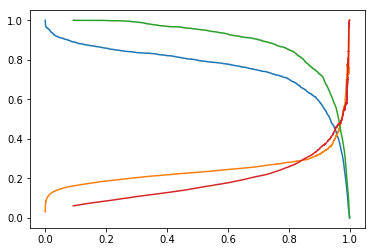

In [113]:
plt.plot(thresholds,recall[:-1])
plt.plot(thresholds, precision[:-1])
plt.plot(thresholds2,recall2[:-1])
plt.plot(thresholds2, precision2[:-1])


In [97]:
thresholds

array([0.09183574, 0.09183718, 0.09184584, ..., 0.9998574 , 0.99987113,
       0.9998932 ], dtype=float32)

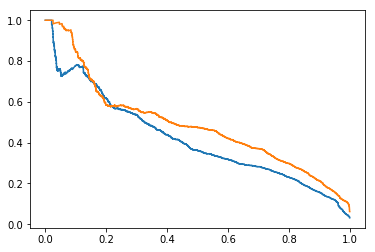

In [114]:
plt.plot(recall, precision)
plt.plot(recall2, precision2)

0.011213932934754355

In [121]:
np.empty((0,10))

array([], shape=(0, 10), dtype=float64)